# Training a model
To train the initial model, please refer to `./model_training/train.ipynb`\
To get the testing examples to pass to the metric, please refer to `./model_training/test_dataset.ipynb`

# Results Analysis
In this file I will analyse the results obtained from my metric.

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.display import HTML

We will start by loading all data from the csv files, from both the MNIST measures and the ResNet measures

In [19]:
display(HTML("<h1>MNIST</h1>"))

## MNIST

MEASURES_PATH = "../tests/data/measures"
# Lime

# Normal Examples
well_classified_lime = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-well_classified-lime.csv").drop(columns=["feature_pid"])
wrongly_classified_lime = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-wrongly_classified-lime.csv").drop(columns=["feature_pid"])

# Adversarial Examples
original_adv_lime = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-original_adv_examples-lime.csv").drop(columns=["feature_pid"])
adv_examples_lime = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-adv_examples-lime.csv").drop(columns=["feature_pid"])

# Display LIME adversarial examples side by side
lime_comparison = pd.concat([
    well_classified_lime.describe().add_prefix('Well_'),
    wrongly_classified_lime.describe().add_prefix('Wrongly_'),
    original_adv_lime.describe().add_prefix('Original_'),
    adv_examples_lime.describe().add_prefix('Adversarial_')
], axis=1)

display(HTML("<h2>LIME Comparison</h2>"))
display(lime_comparison)


# Saliency

# Normal Examples
well_classified_saliency = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-well_classified-saliency.csv").drop(columns=["feature_pid"])
wrongly_classified_saliency = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-wrongly_classified-saliency.csv").drop(columns=["feature_pid"])

# Adversarial Examples
original_adv_saliency = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-original_adv_examples-saliency.csv").drop(columns=["feature_pid"])
adv_examples_saliency = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-adv_examples-saliency.csv").drop(columns=["feature_pid"])

# Display Saliency adversarial examples side by side
saliency_comparison = pd.concat([
    well_classified_saliency.describe().add_prefix('Well_'),
    wrongly_classified_saliency.describe().add_prefix('Wrongly_'),
    original_adv_saliency.describe().add_prefix('Original_'),
    adv_examples_saliency.describe().add_prefix('Adversarial_')
], axis=1)

display(HTML("<h2>Saliency Comparison</h2>"))
display(saliency_comparison)

,Well_score,Wrongly_score,Original_score,Adversarial_score
count,10.000000,10.000000,10.000000,10.000000
mean,1.291973,1.114961,1.339241,1.331597
std,0.248839,0.367320,0.329469,0.338861
min,0.849044,0.517794,0.872430,0.940010
25%,1.116333,0.832293,1.045741,1.084259
50%,1.296755,1.087834,1.345856,1.237988
75%,1.419410,1.493772,1.629486,1.538439
max,1.659332,1.528051,1.757202,1.915333


,Well_score,Wrongly_score,Original_score,Adversarial_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.693435,0.520612,0.665464,0.621151
std,0.065874,0.121236,0.067655,0.121034
min,0.584052,0.378546,0.592656,0.337235
25%,0.647907,0.436860,0.620941,0.577508
50%,0.687677,0.461901,0.638694,0.623713
75%,0.734649,0.597166,0.703642,0.717080
max,0.797037,0.722882,0.815057,0.751398


In [20]:
display(HTML("<h1>Income</h1>"))

## Income
income_well_classified_lime = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-well_classified-lime.csv").drop(columns=["feature_pid"])
income_wrongly_classified_lime = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-wrongly_classified-lime.csv").drop(columns=["feature_pid"])
income_original_adv_lime = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-original_adv_examples-lime.csv").drop(columns=["feature_pid"])
income_adv_lime = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-adv_examples-lime.csv").drop(columns=["feature_pid"])

# Display LIME adversarial examples side by side for Income
income_lime_comparison = pd.concat([
    income_well_classified_lime.describe().add_prefix('Well_'),
    income_wrongly_classified_lime.describe().add_prefix('Wrongly_'),
    income_original_adv_lime.describe().add_prefix('Original_'),
    income_adv_lime.describe().add_prefix('Adversarial_')
], axis=1)
display(HTML("<h2>LIME Comparison</h2>"))
display(income_lime_comparison)


# Saliency
income_well_classified_saliency = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-well_classified-saliency.csv").drop(columns=["feature_pid"])
income_wrongly_classified_saliency = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-wrongly_classified-saliency.csv").drop(columns=["feature_pid"])
income_original_adv_saliency = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-original_adv_examples-saliency.csv").drop(columns=["feature_pid"])
income_adv_saliency = pd.read_csv(
    f"{MEASURES_PATH}/income_local_lipschitz_estimate-adv_examples-saliency.csv").drop(columns=["feature_pid"])

# Display Saliency adversarial examples side by side for Income
income_saliency_comparison = pd.concat([
    income_well_classified_saliency.describe().add_prefix('Well_'),
    income_wrongly_classified_saliency.describe().add_prefix('Wrongly_'),
    income_original_adv_saliency.describe().add_prefix('Original_'),
    income_adv_saliency.describe().add_prefix('Adversarial_')
], axis=1)
display(HTML("<h2>Saliency Comparison</h2>"))
display(income_saliency_comparison)

,Well_score,Wrongly_score,Original_score,Adversarial_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.141472,0.900663,2.755988,1.680855
std,0.113494,0.291098,1.137888,0.983512
min,0.044220,0.411013,1.528741,0.677125
25%,0.056645,0.643577,1.919209,0.827945
50%,0.103485,1.055881,2.295358,1.350993
75%,0.187805,1.117105,3.501539,2.622308
max,0.397792,1.176827,4.701009,3.008694


,Well_score,Wrongly_score,Original_score,Adversarial_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.472743,1.875043,1.765057,1.703298
std,0.391766,0.818525,0.746194,0.594191
min,0.112158,0.716469,0.880072,0.941192
25%,0.216510,1.495388,1.305047,1.341680
50%,0.387572,1.870662,1.634410,1.567549
75%,0.415698,2.082152,2.129064,2.176069
max,1.311768,3.811330,3.040347,2.688369


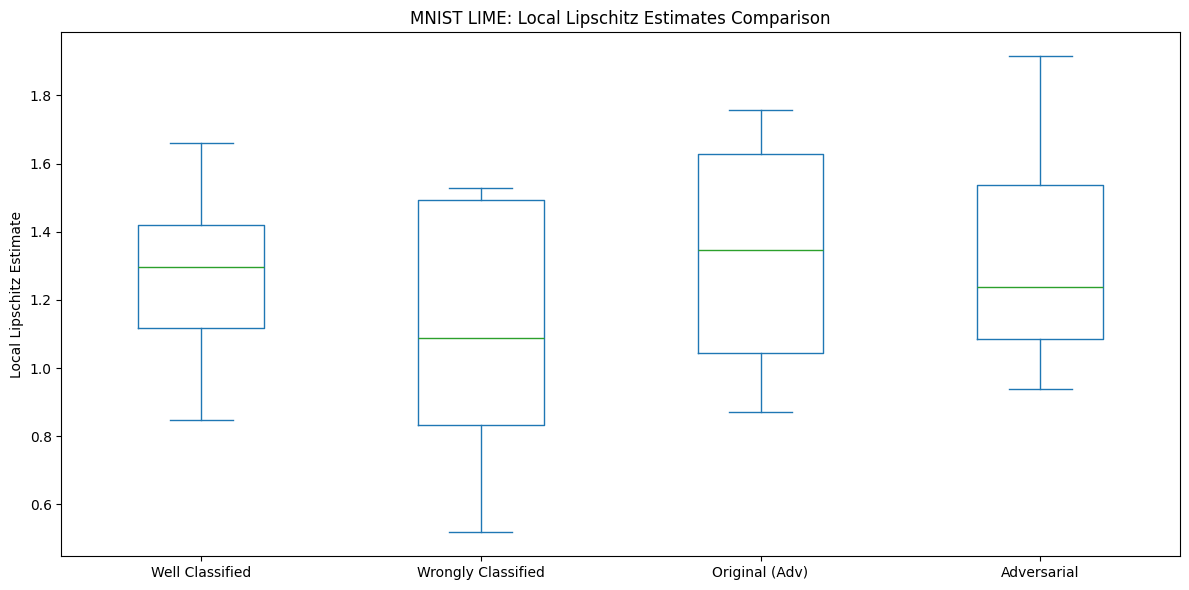

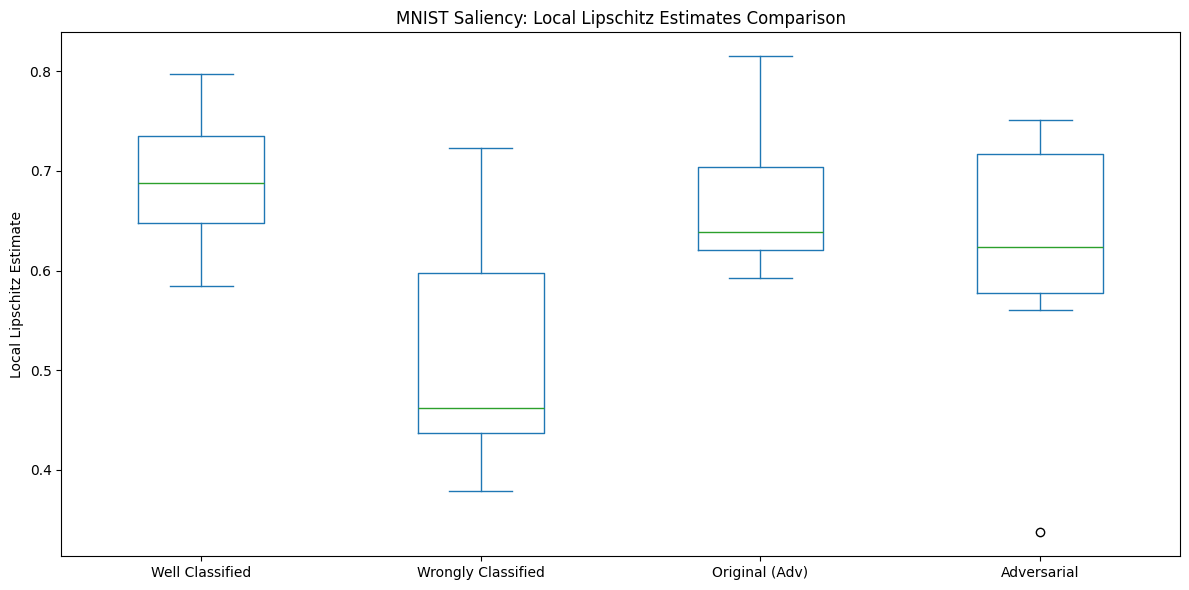

In [21]:
# LIME - All 4 comparisons on one graph
lime_combined_data = pd.DataFrame({
    'Well Classified': well_classified_lime['score'],
    'Wrongly Classified': wrongly_classified_lime['score'],
    'Original (Adv)': original_adv_lime['score'],
    'Adversarial': adv_examples_lime['score']
})
lime_combined_data.plot(kind='box', figsize=(12, 6), title='MNIST LIME: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

# Saliency - All 4 comparisons on one graph
saliency_combined_data = pd.DataFrame({
    'Well Classified': well_classified_saliency['score'],
    'Wrongly Classified': wrongly_classified_saliency['score'],
    'Original (Adv)': original_adv_saliency['score'],
    'Adversarial': adv_examples_saliency['score']
})
saliency_combined_data.plot(kind='box', figsize=(12, 6), title='MNIST Saliency: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

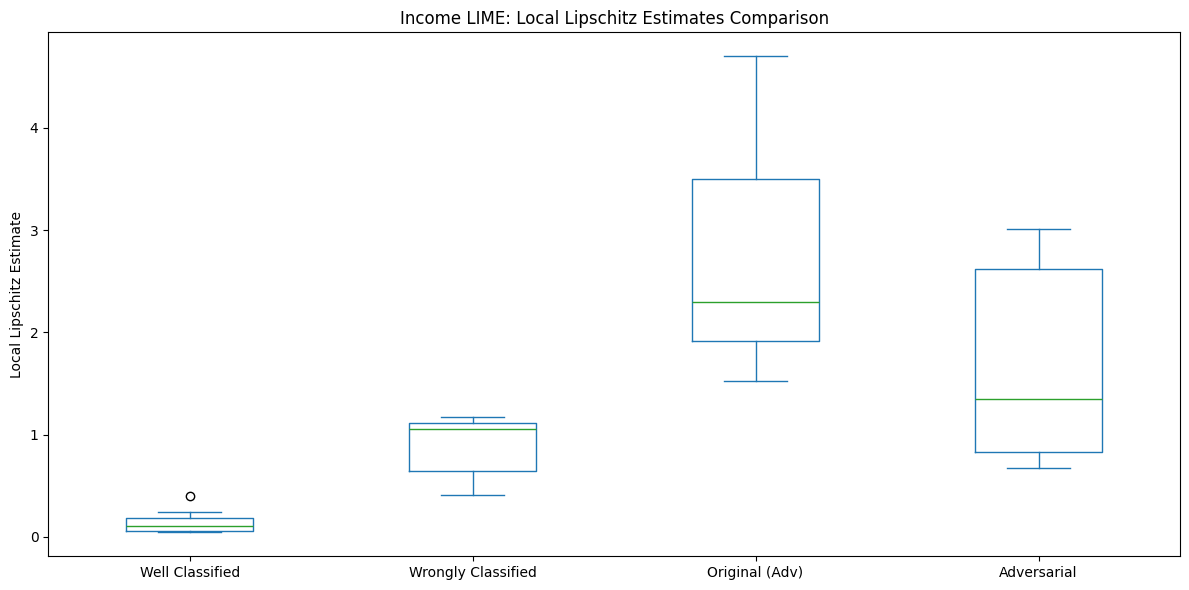

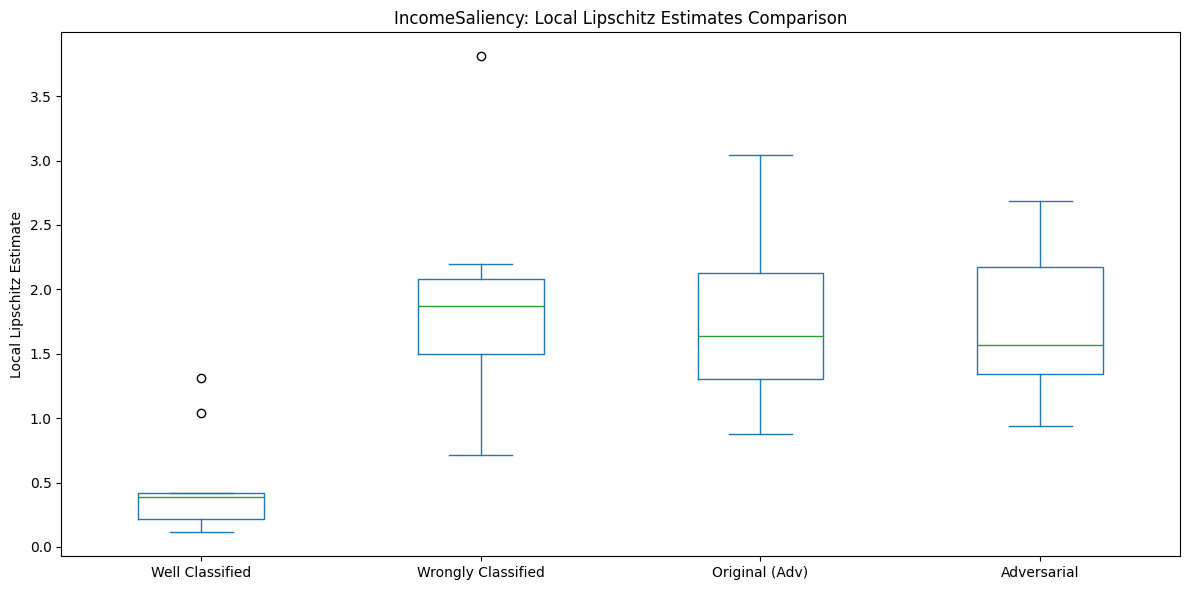

In [22]:
# LIME - All 4 comparisons on one graph
income_lime_combined_data = pd.DataFrame({
    'Well Classified': income_well_classified_lime['score'],
    'Wrongly Classified': income_wrongly_classified_lime['score'],
    'Original (Adv)': income_original_adv_lime['score'],
    'Adversarial': income_adv_lime['score']
})
income_lime_combined_data.plot(kind='box', figsize=(12, 6), title='Income LIME: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

# Saliency - All 4 comparisons on one graph
income_saliency_combined_data = pd.DataFrame({
    'Well Classified': income_well_classified_saliency['score'],
    'Wrongly Classified': income_wrongly_classified_saliency['score'],
    'Original (Adv)': income_original_adv_saliency['score'],
    'Adversarial': income_adv_saliency['score']
})
income_saliency_combined_data.plot(kind='box', figsize=(12, 6), title='IncomeSaliency: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

## Results analysis

Before analysing the results we have to understand what is this metric about.\
This metric analyse how stable a specific explainability function (EF) is, this is, starting with some examples, their classifications and their initial explanations given by the EF, how stable are they when we perturb the inputs slightly by a certain noise?

This metric then allows us to deduce whether we are choosing the right explanation function or not, and if we are not, we could redo this analysis using different functions until the one that explains the user how a decision was made in a way that slight disturbances to it still yield the same results.

This is especially important in the field of cybersecurity because creating robust models is a must when they are exposed to the public, in some way or another, such that if an attack is ever successful, instead on hoping that some fix works, for example adversarial training (which sometimes is uneffective), we can understand what needs to be tweaked and how, to guarantee that this attack vector is minimized in the future.

### How to read the metric
The output of LocalLipschitzEstimate is a score where lower is better. A low score means the explanation changes very little when the input is perturbed, indicating high stability.


### Analysis

By analysing the data obtained, we can see that theres a wide diversity of values of the LLE (Local Lipschitz Estimation). It appears that the explainability function is not completely stable, however it should be noted that this result could be due to the low amount of examples used to analyse the explainability function.

#### MNIST Dataset

When looking at the LLE values for the Saliency metric, we can clearly notice that there's a smaller variance in them, which can be understood that Saliency is more stable around its explanations.

One good thing to look at, is at the stability of LIME under adversarial examples. I consider LIME's stability under deviations from adversarial examples especially confusing, given that these examples are close to the border between being well classified and missclassified, this result could be possibly explained by looking at the radius of perturbation from LLE, which is set at 1/4 of the std of the pixel values. Perhaps this perturbation radius is small enough compared to the perturbation made by the attack.
Nonetheless, we do see a slight increase of instability in the LLE of these examples, as the LLE  on the examples previous to the attack had a tighter variance, but an lower average LLE, givint the idea that it could be less unstable.

When looking at LLE metric using Saliency explanation function, we do see an overall improvement, this could be due to this evaluation function being more simple but not as robust as LIME. As, even though, the stability of the metric could be lower than LIME, it does not evaluate the effectiveness of the metric itself, just that its explanations are robust against small deviations.
In this configuration of the metric, we do see a slighht detriment to the stability when evaluated with some examples and their adversarial examples, however it could be a neglectable difference.

#### Income Dataset
When analysing the income dataset, we see what we where expecting, since its a simple model, the overall explanations of well classified and wrongly classified data make sense for LIME, for saliency this data is not so straighforward, this could have several reasons such as the model not being well trained having then overfit or the small number of examples used to test the metric.

One point that really stands is that well classified examples were considered completely stable by both explainability functions, which makes me confident to say that perhaps overfit may not be a totally correct explanation. Looking at the adversarial examples, theres a wide variance of LLE values, some examples are way more stable than others, I believe that as mentioned before, it relates with how close the examples are to the border between being well-classified and missclassified.

#### Conclusion

I believe that the metric can be considered a success, even thought it sometimes being very slow, due to the LLE values matching the expected values: simpler models are easier to explain so they should be more stable and the opposite for more complex models with more features, adversary examples have to have a wider variance because they are closer to the borders of being well- and missclassified, and well classified examples being more stable under well tested Explainability functions such as LIME.
This performance problem is bigger for models with a large number of features and more complex models, however this also heavily depends on the Explainability function passed, their parameters and LLE parameters.